> We are going to use the `USA_Housing` or `sample_data/california_housing...` dataset. Since house price is a continues variable, this is a regression problem. The data contains the following columns:

> * '`Avg. Area Income`': Avg. Income of residents of the city house is located in.
> * '`Avg. Area House Age`': Avg Age of Houses in same city
> * '`Avg. Area Number of Rooms`': Avg Number of Rooms for Houses in same city
> * '`Avg. Area Number of Bedrooms`': Avg Number of Bedrooms for Houses in same city
> * '`Area Population`': Population of city hou  se is located in
> * '`Price`': Price that the house sold at
> * '`Address`': Address for the house

Let's try and create a model that can predict the price of a house based on the variables and historical data


# Import standard libraries

In [189]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
from sklearn import datasets
print("Pandas Version: {}".format(pd.__version__))
print("Numpy Version: {}".format(np.__version__))
print("Matplotlib Version: {}".format(matplotlib.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Seaborn Version: {}".format(sns.__version__))
np.set_printoptions(suppress=True, linewidth=130)

# set styles 
plt.style.use("fivethirtyeight")  #  tries to replicate the styles from FiveThirtyEight.com
sns.set_style("whitegrid")

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)

# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions


print(f'the present working directory is: {os.getcwd()}')
DATA_PATH = os.path.join("data")
PROJECT_ROOT_DIR = "."

def load_model_data(data):
    pwd = os.getcwd() 
    filepath = os.path.join(pwd, DATA_PATH, data) 
    return pd.read_csv(filepath)     
    
df = load_model_data("USA_Housing.csv");

Pandas Version: 1.2.5
Numpy Version: 1.19.5
Matplotlib Version: 3.4.2
Scikit-learn Version: 0.24.2
Seaborn Version: 0.11.1
the present working directory is: /Users/jvang/Documents/Projects/Applied_AI_IT_Uni


## Explore the data a bit.
### List:

1.   First few rows
2.   Basic statistic
3.   .info()
4.   Column names

Questions:

1. What is the dependent variable (column name)? 
2. What are the independent variables?
3. Should we normalize the data?
4. What are the column data-types?

- price 
- Income, Age, Room, Bedrooms, Population 
or [Avg. Area Income, Avg. Area Number of Rooms, Avg. Area Number of Bedrooms, Area Population, Address]
- the data looks Gaussian destributed (a bell curve). <br>
    Standardization could be useful as the data has varying scales and the algorithm that we are using linear regression assumes a Gaussian distribution. 
- floats except 'Address'.  

In [190]:
features = np.shape(df)[0]
samples = np.shape(df)[1]
print(f"Shape of Dataset: {samples} x {features}\n\t* Number of samples:\t{samples}\n\t* Number of features:\t{features}")

Shape of Dataset: 7 x 5000
	* Number of samples:	7
	* Number of features:	5000


In [191]:
def InfoColumns(df):
    d = {"Column Name": [], "Type": [], "Null Values": []}
    for c in df.columns:
        col = pd.isnull(df[c])
        d["Column Name"].append(c)
        d["Type"].append(df[c].dtype)
        d["Null Values"].append(np.shape(df[col])[0])
    return pd.DataFrame(d)
print(InfoColumns(df))

#or just df.info()


                    Column Name     Type  Null Values
0              Avg. Area Income  float64            0
1           Avg. Area House Age  float64            0
2     Avg. Area Number of Rooms  float64            0
3  Avg. Area Number of Bedrooms  float64            0
4               Area Population  float64            0
5                         Price  float64            0
6                       Address   object            0


In [192]:
df.columns.to_list();
df = df.rename(columns=
{'Avg. Area Income':'Income',
 'Avg. Area House Age':'Age',
 'Avg. Area Number of Rooms':'Room',
 'Avg. Area Number of Bedrooms':'Bedrooms',
 'Area Population':'Population',
 'Price':'Price'});

In [193]:
# remove address from the data & describe 
df = df.drop(['Address'], axis=1).round(3)
df.describe()

,Income,Age,Room,Bedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108977,5.977224,6.987793,3.981330,36163.516034,1.232073e+06
std,10657.991215,0.991450,1.005835,1.234137,9925.650112,3.531176e+05
min,17796.631000,2.644000,3.236000,2.000000,172.611000,1.593866e+04
25%,61480.562250,5.322000,6.299000,3.140000,29403.929000,9.975771e+05
50%,68804.286500,5.970500,7.003000,4.050000,36199.406500,1.232669e+06
75%,75783.338500,6.651000,7.666250,4.490000,42861.290750,1.471210e+06
max,107701.748000,9.519000,10.760000,6.500000,69621.713000,2.469066e+06


In [194]:
df.head(5)

,Income,Age,Room,Bedrooms,Population,Price
0,79545.459,5.683,7.009,4.09,23086.801,1059033.558
1,79248.642,6.003,6.731,3.09,40173.072,1505890.915
2,61287.067,5.866,8.513,5.13,36882.159,1058987.988
3,63345.240,7.188,5.587,3.26,34310.243,1260616.807
4,59982.197,5.041,7.839,4.23,26354.109,630943.489


# Exploratory Data Analysis (EDA)

Create some simple plots to check out the data!

1.   Plot the pairwise scatter-plot between each column
2.   Plot the distribution of the values of the dependent variable
3.   Plot the pairwise correlation heatmap of each column.

Answer questions:

1.  What are the assumptions of the linear regression model?<br>

The housing price is linear corrolated to other features such as number of rooms and size etc.<br>
- There are four assumptions associated with a linear regression model:<br>
    - Linearity: The relationship between X and the mean of Y is linear.<br>
    - Homoscedasticity: The variance of residual is the same for any value of X.<br>
    - Independence: Observations are independent of each other.<br>
    - Normality: For any fixed value of X, Y is normally distributed.<br>

2.  Can we accept the basic assumptions of the linear regression model?<br>

To fit a linear regression model, we select those features which have a high correlation with our target variable Price. By looking at the correlation matrix we can see that 'income' has a strong positive correlation with 'Price' (0.64) where as Bedrooms has a low correlation with Price (0.17).


3.  Judging by the scatter-plots, do you see any patterns in the data?<br>

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables. several things can be observed for instance more rooms tends to have higher price and so on. 
4.  Judging by the correlation heat-map, is there correlation between the dependent variable and the independent variables?<br>
5.  Are there correlations among independent variables?<br>
bedrooms and rooms are sligtly corrolated


/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


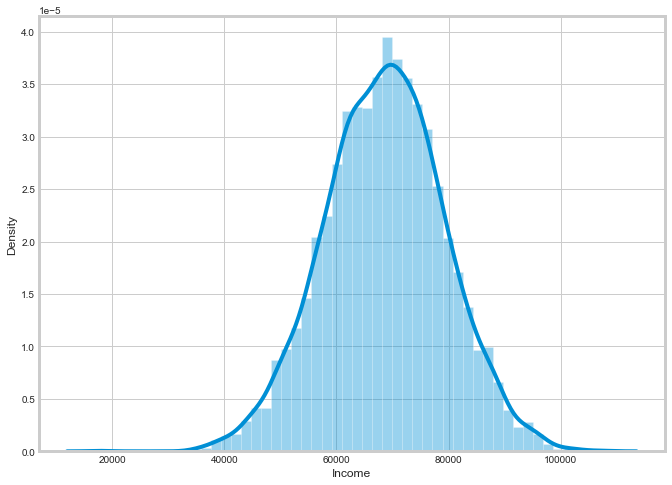

In [195]:
sns.distplot(df['Income']);

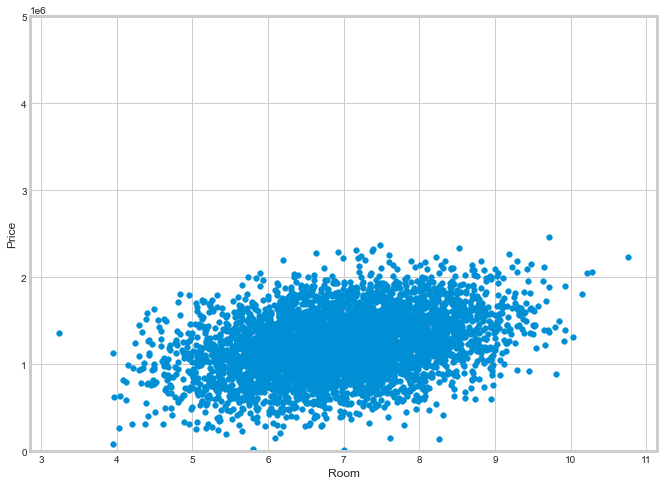

In [196]:
var = 'Room'
data = pd.concat([df['Price'], df[var]], axis=1)
data.plot.scatter(x=var, y='Price', ylim=(0,5000000), s=32);

In [197]:
df.head()

,Income,Age,Room,Bedrooms,Population,Price
0,79545.459,5.683,7.009,4.09,23086.801,1059033.558
1,79248.642,6.003,6.731,3.09,40173.072,1505890.915
2,61287.067,5.866,8.513,5.13,36882.159,1058987.988
3,63345.240,7.188,5.587,3.26,34310.243,1260616.807
4,59982.197,5.041,7.839,4.23,26354.109,630943.489


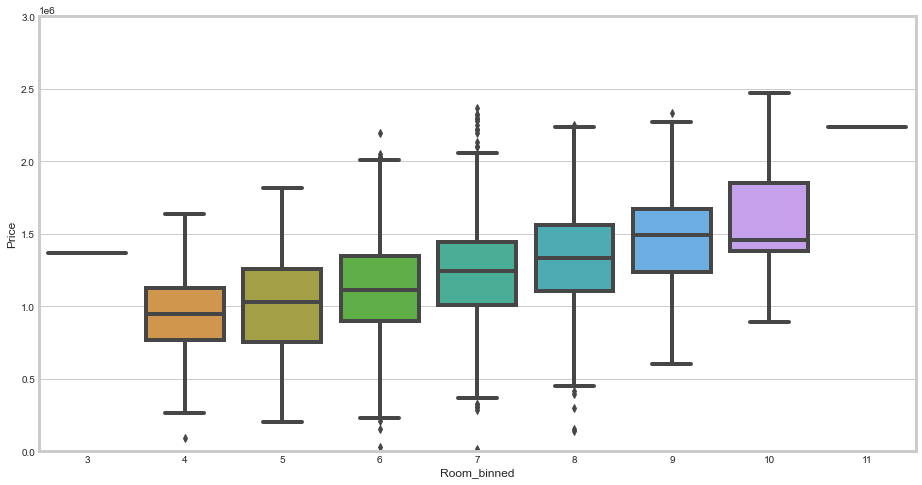

In [198]:

df['Room_binned'] = df['Room'].round(0).astype(int)

var = 'Room_binned'
data = pd.concat([df['Price'], df[var]], axis=1)

f, ax = plt.subplots(figsize=(14, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=3000000);

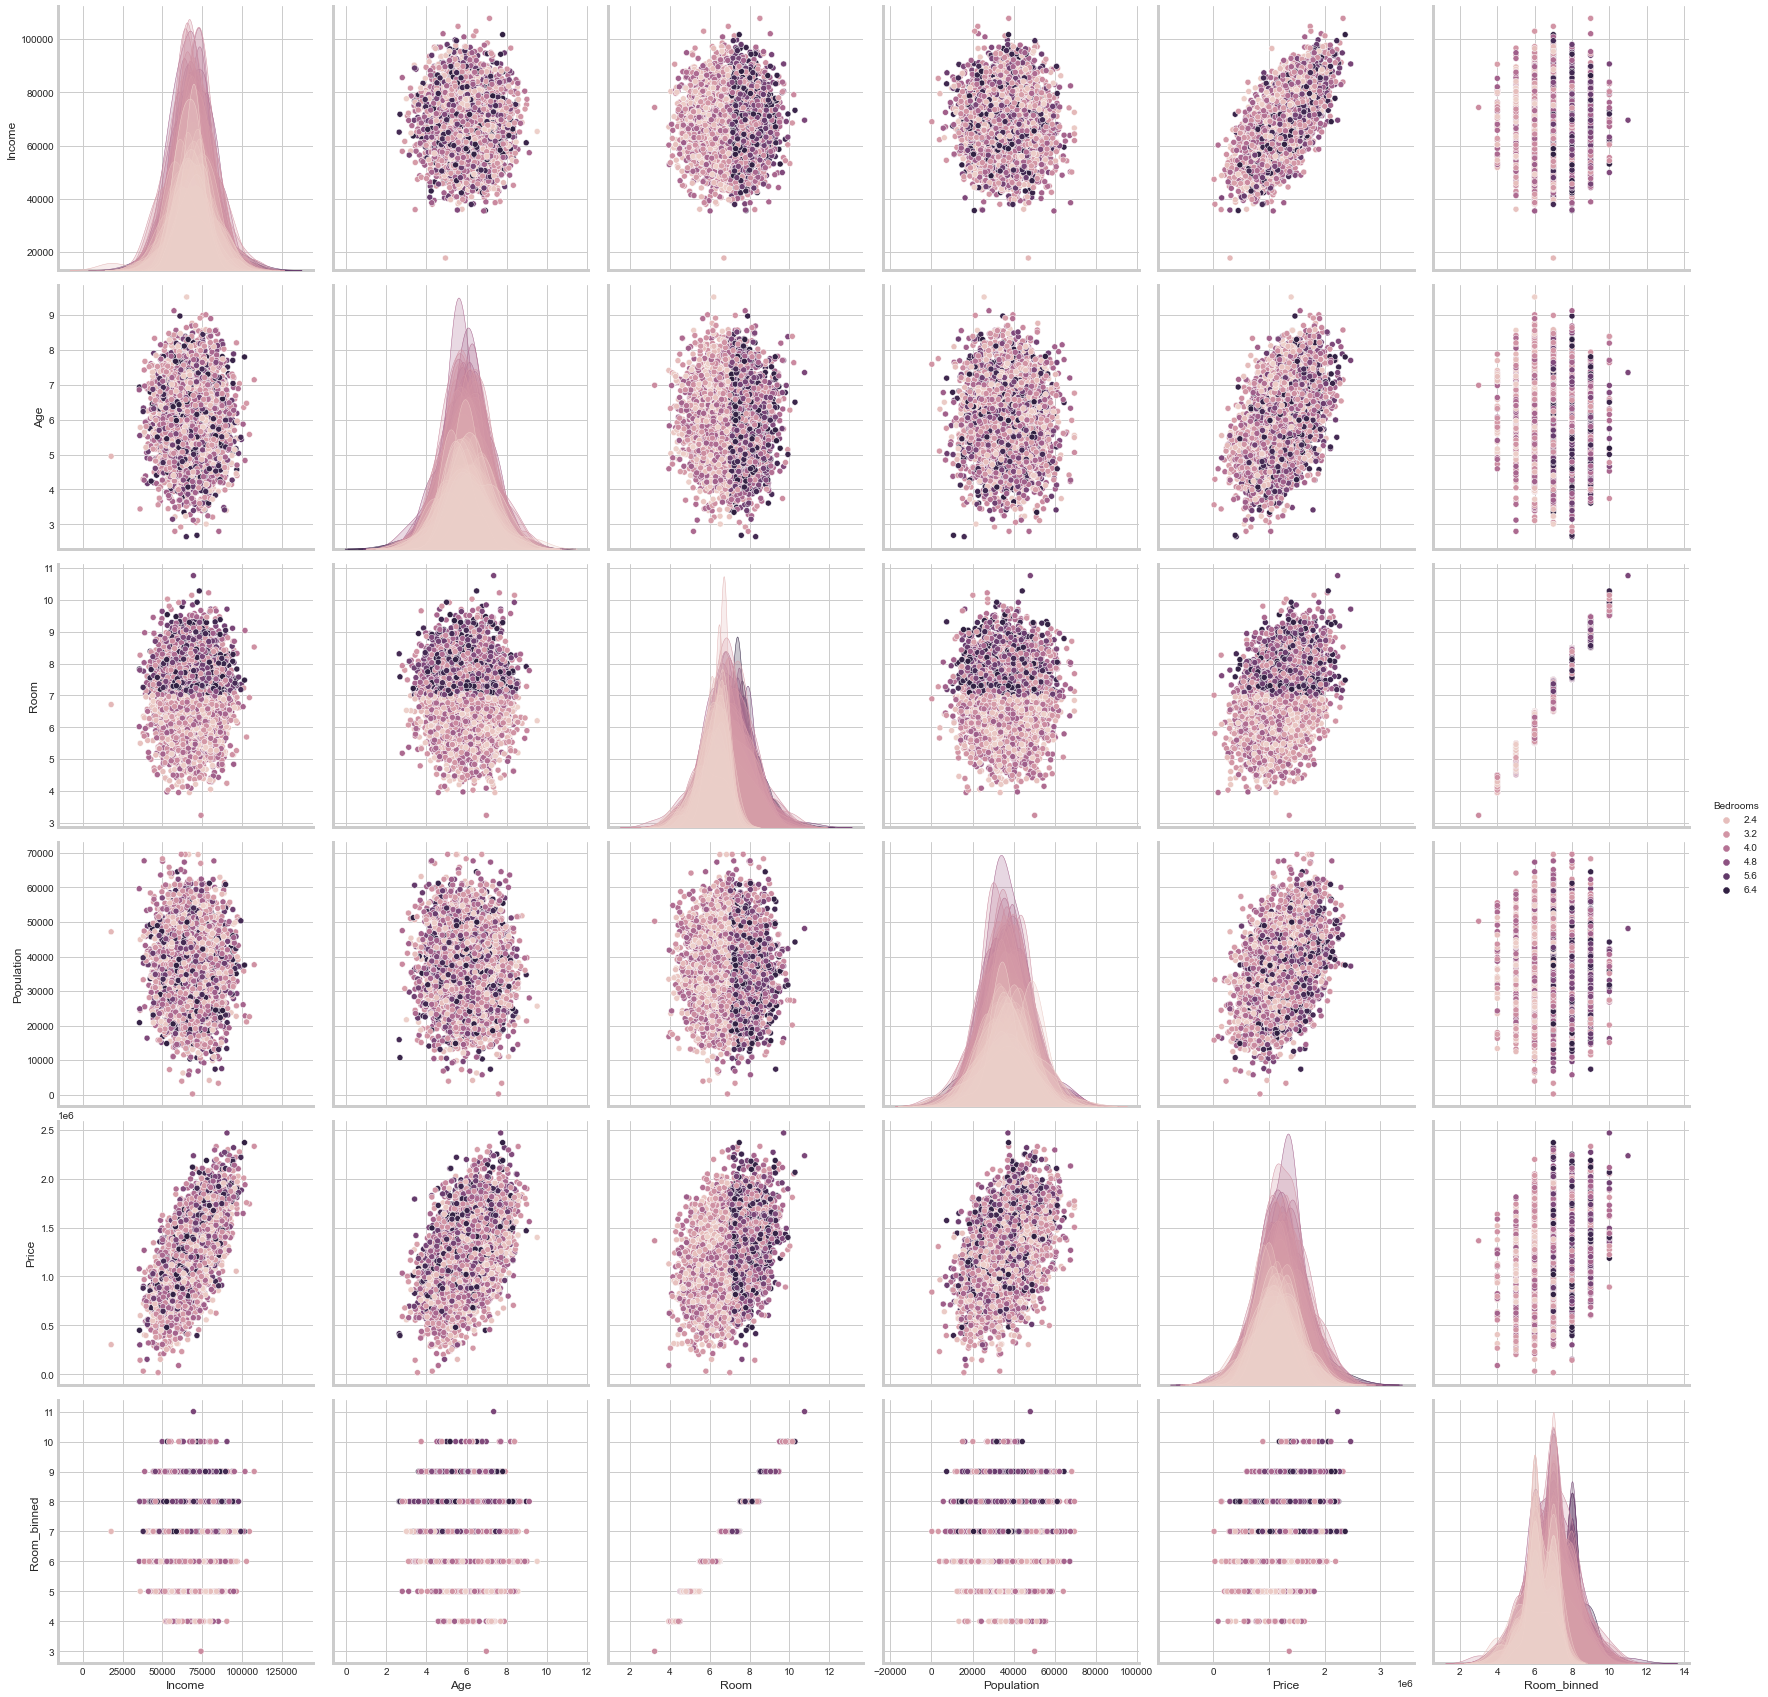

In [199]:
# Exploratory Data Analysis (EDA)
# Plot the pairwise scatter-plot between each column
sns.pairplot(df, height=4  , hue='Bedrooms')



####  Explore the data a bit.


  

/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


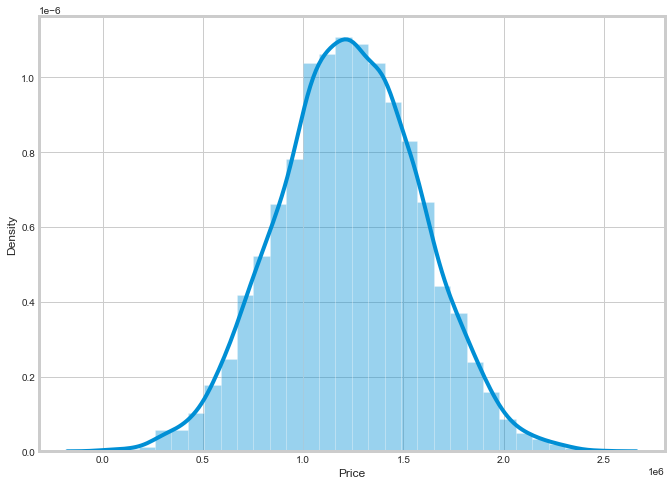

In [200]:
# Exploratory Data Analysis (EDA)
#2. Plot the distribution of the values of the dependent variable
sns.distplot(df['Price'], bins=30);

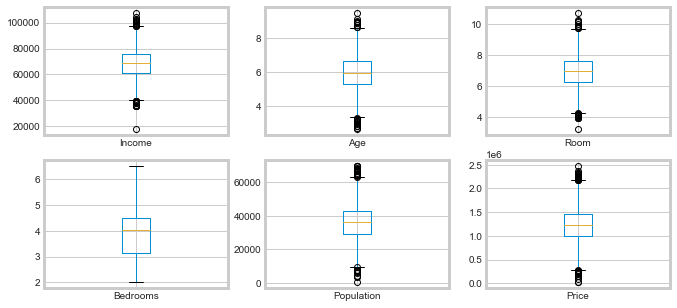

In [201]:
df = df.drop(['Room_binned'], axis=1)
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) 
plt.show()

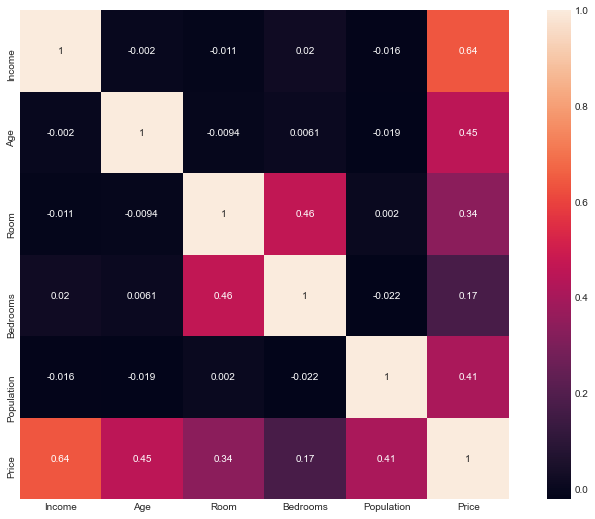

In [202]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True,annot=True);

# Training a Linear Regression Model
## X and y arrays

Tasks:

1. Split the data-frame into an `X` array and and `y` array
2. Are all columns useful for linear regression? Is there some that should be excluded? Exclude the useless ones

In [203]:
# question 2 addresses have already been removed
array = df.values
array
array.shape


(5000, 6)

In [204]:
df.head(5)

,Income,Age,Room,Bedrooms,Population,Price
0,79545.459,5.683,7.009,4.09,23086.801,1059033.558
1,79248.642,6.003,6.731,3.09,40173.072,1505890.915
2,61287.067,5.866,8.513,5.13,36882.159,1058987.988
3,63345.240,7.188,5.587,3.26,34310.243,1260616.807
4,59982.197,5.041,7.839,4.23,26354.109,630943.489


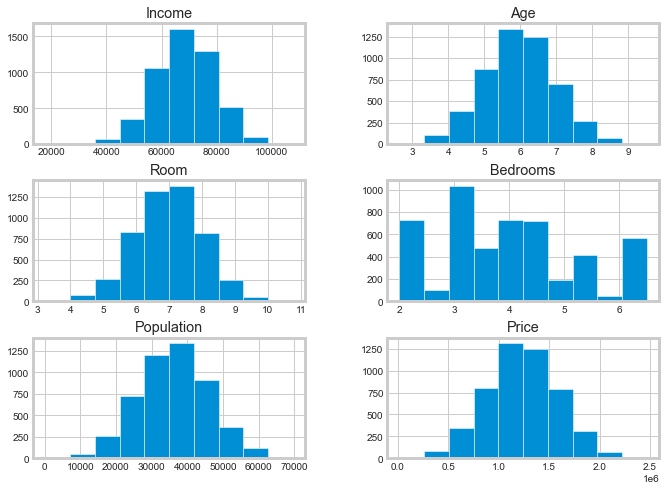

In [205]:
df.hist()
plt.show()

## Train / Test Split

We need to split the data into the train and test subsets.

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Target column must be last to work below all cell's code correctly, 
# If you don't have your target colum last then make necessary changes to below two lines of code
array = df.values
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# 
X = array[:, :-1]
y = array[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [207]:
from sklearn import metrics


    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)


test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 202452.71174
MSE: 64103382788.381546
RMSE: 253186.45854069988
R2 Square 0.47897176022503296
Train set evaluation:

MAE: 202700.60152662502
MSE: 63658329816.24353
RMSE: 252306.02413783848
R2 Square 0.4909151848949731


# Preparing Data For Linear Regression
> Linear regression is been studied at great length, and there is a lot of literature on how your data must be structured to make best use of the model.

> As such, there is a lot of sophistication when talking about these requirements and expectations. In practice, you can uses these rules more as rules of thumb when using Ordinary Least Squares Regression, the most common implementation of linear regression.

> Try different preparations of your data using these heuristics and see what works best for your problem.

Assess the following steps using the plots you made earlier and answer whether the assumtions and conditions are being met:

- **Linear Assumption.** Linear regression assumes that the relationship between your input and output is linear. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

Answer:

- **Rescale Inputs:** Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

Answer:

- **Remove Collinearity.** Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.

Answer:

- **Gaussian Distributions.** Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.

Answer: 


In [208]:
# Hint:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Linear Regression

Take the most correlated dependent/independent pair and calculate the `beta` parameters for Simple linear regression.

Use `skitlearn` to fit the linear model and see if your calculation corresponds to what the library did.

Use `skitlearn` to fit the linear model dependent on all independent variables (normalize inputs).

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression


pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)


lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

LinearRegression(normalize=True)

## Model Evaluation

Check the model coefficients and and describe how can we interpret them.

In [210]:
#df.columns
X = df[['Income', 'Age', 'Room', 'Bedrooms', 'Population']]

In [211]:
# print the intercept
print(lin_reg.intercept_)

coeff_df = pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coefficient'])
coeff_df

1229576.9925642507


,Coefficient
Income,231742.036072
Age,163580.497268
Room,120723.956688
Bedrooms,2992.385748
Population,152235.797419


Tasks:

Interpreting the coefficients:
- Holding all other features fixed, a 1 unit increase in **Avg. Area Income** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area House Age** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Rooms** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Avg. Area Number of Bedrooms** is associated with an **increase of ???**.
- Holding all other features fixed, a 1 unit increase in **Area Population** is associated with an **increase of ???**.

## Predictions from our Model

Tasks:

1.  Take the test data and plot the predicted vs. true value scatter plot.

2.  Plot the histogram of residual values

3.  Make a scatter plot of residuals depending on the predicted value.

In [212]:
pred = lin_reg.predict(X_test)

/usr/local/anaconda3/envs/AI_ITU/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


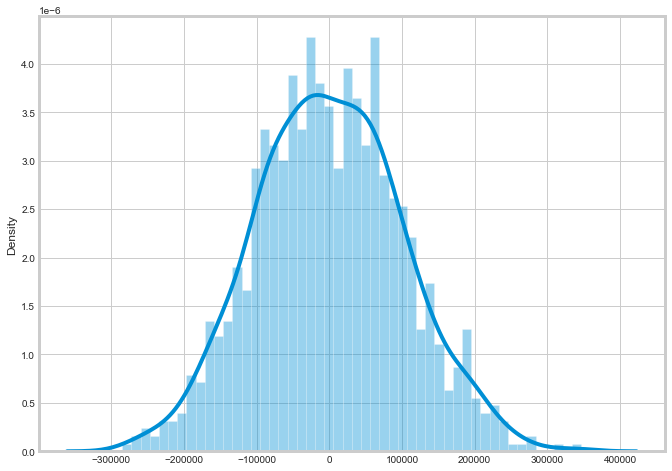

In [213]:
sns.distplot((y_test-pred),bins=50);

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> 📌 Comparing these metrics:
- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, and is easier to calculate derivations.
- **RMSE** RMSE is more interpretable.

> All of these are **loss functions**, and we want to minimize them.


Tasks:

1.  What is the interpretation of the $R^2$ score?

2.  Pack these values into a Pandas data frame

In [214]:
from sklearn import metrics

In [215]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 80878.85231723156
MSE: 10089165283.277058
RMSE: 100444.83701652892


# Polynomial Regression
> Source: [scikit-learn](http://scikit-learn.org/stable/modules/linear_model.html#polynomial-regression-extending-linear-models-with-basis-functions)

***

> One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

> For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2$$

> If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y}(w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_1^2 + w_5 x_2^2$$

> The (sometimes surprising) observation is that this is still a linear model: to see this, imagine creating a new variable

$$z = [x_1, x_2, x_1 x_2, x_1^2, x_2^2]$$

> With this re-labeling of the data, our problem can be written

$$\hat{y}(w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5$$

> We see that the resulting polynomial regression is in the same class of linear models we’d considered above (i.e. the model is linear in w) and can be solved by the same techniques. By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.
***

Tasks:

1.  Fit the data to polynomial model of degree 2
2.  Repeat the analysis from the simple regression and show the loss functions
3.  Did polynomoial regression improve the fit? how did you come to that conclusion?

In [216]:
# Hint:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)


In [217]:
X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.transform(X_test)

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train_poly, y_train)

test_pred = lin_reg.predict(X_test_poly)
train_pred = lin_reg.predict(X_train_poly)

print("Test set evaluation:\n")
print_evaluate(y_test, test_pred)
print("Train set evaluation:\n")
print_evaluate(y_train, train_pred)


Test set evaluation:

MAE: 80885.6657046129
MSE: 10099339179.127508
RMSE: 100495.4684507093
R2 Square 0.9179132100912327
Train set evaluation:

MAE: 81388.47686066545
MSE: 10235294094.161003
RMSE: 101169.63029566235
R2 Square 0.9181468816961964


# Artficial Neural Networks



Tasks:

1.  Build a neural network using Keras or PyTorch and fit the weights to predict the house price.

2.  Train the neural network for 100 epochs.

3.  What are the losses compared to the linear model?

4.  Is the neural network performin better or worse?

In [218]:
array = df.values
# X = df.iloc[:, :-1]
# y = df.iloc[:, -1]
# 
X = array[:, :-1]
y = array[:, -1]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3
)

print(f"{X_train.shape}\n{X_test.shape}\n{y_train.shape}\n{y_test.shape}")

(3500, 5)
(1500, 5)
(3500,)
(1500,)


In [219]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

model = tf.keras.Sequential([
    keras.layers.Dense(X_train.shape[1], activation='relu'),
    #keras.layers.Dense(32, activation='relu'),
    #tf.keras.model.Dropout(0.2),
    #keras.layers.Dense(64, activation='relu'),
    #tf.keras.model.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    #tf.keras.model.Dropout(0.2),
    keras.layers.Dense(512, activation='relu'),
    #tf.keras.model.Dropout(0.1),
    keras.layers.Dense(1) # one output for price
])
model.compile(optimizer=Adam(0.00001), loss='mse')
r = model.fit(X_train, y_train,
              validation_data=(X_test,y_test),
              batch_size=1,
              epochs=100)

2.5.0
Epoch 1/100
3500/3500 [==============================] - 4s 1ms/step - loss: 1179333296128.0000 - val_loss: 567715233792.0000
Epoch 2/100
3500/3500 [==============================] - 4s 1ms/step - loss: 206192066560.0000 - val_loss: 81599537152.0000
Epoch 3/100
3500/3500 [==============================] - 4s 1ms/step - loss: 79353028608.0000 - val_loss: 79630417920.0000
Epoch 4/100
3500/3500 [==============================] - 5s 1ms/step - loss: 77955211264.0000 - val_loss: 78230528000.0000
Epoch 5/100
3500/3500 [==============================] - 5s 1ms/step - loss: 76646383616.0000 - val_loss: 76897378304.0000
Epoch 6/100
3500/3500 [==============================] - 4s 1ms/step - loss: 75502804992.0000 - val_loss: 75653636096.0000
Epoch 7/100
3500/3500 [==============================] - 3s 974us/step - loss: 74398826496.0000 - val_loss: 74564583424.0000
Epoch 8/100
3500/3500 [==============================] - 3s 891us/step - loss: 73338298368.0000 - val_loss: 73564209152.0000
Ep

In [ ]:
pd.DataFrame(r.history)

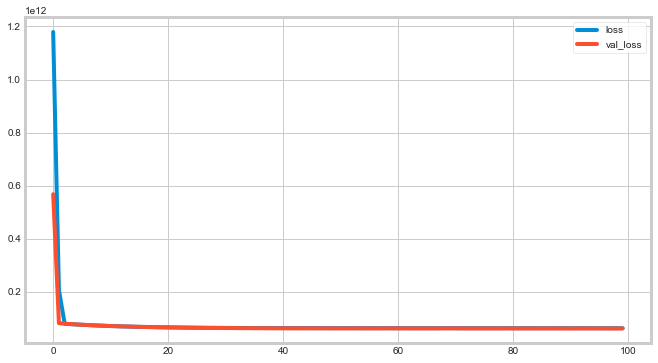

In [220]:
plt.figure(figsize=(10, 6))

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [221]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

Test set evaluation:

MAE: 200008.71814133335
MSE: 61679128204.10529
RMSE: 248352.83007065832
R2 Square 0.49140527796003064
Train set evaluation:

MAE: 200482.32481914284
MSE: 62565981696.25023
RMSE: 250131.92858219886
R2 Square 0.5039085225486069


Linear Regression : 
- MAE: 80878.85231723156
- MSE: 10089165283.277058
- RMSE: 100444.83701652892

Polynomail Regression: 
- Test set evaluation:
- MAE: 80885.6657046129
- MSE: 10099339179.127508
- RMSE: 100495.4684507093

Artficial Neural Network:
Test set evaluation:
- MAE: 200008.71814133335
- MSE: 61679128204.10529
- RMSE: 248352.83007065832
